In [35]:
from cmath import sinh, tanh, cosh
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
SAMPLE_SIZE = 500
LO = 300  # nanometers
HI = 2000 # nanometers
NETA = 0.8  # core power

In [129]:
def P(neta, delta, N, pitch, x, x0):
    """
    Reflected power function
    """
    sqrt = lambda v: v**0.5
    
    g = (1.0/(neta*delta))*((x/x0)-1)
    g = g**2
    
    theta = neta*delta*N*pitch*sqrt(1-g)/x
    
    nr = sinh(theta)**2
    dr = (cosh(theta)**2)-g
    
    return abs(nr/dr)


def reflected_samples(neta, delta, N, pitch, x0):
    """
    func: (function): the function that is being sampled
    l: (double): lower limit
    r: upper bound
    n: number of samples
    rest has their usual meaning
    
    returns : list 
    """
    
    # uniformly sample the function
    # generate sample points
    d = (HI-LO)/SAMPLE_SIZE
    x = LO
    
    X = []
    Y = []
    
    for _ in range(SAMPLE_SIZE):
        X.append(x)
        Y.append(P(neta, delta, N, pitch, x, x0))
        x = x + d
    
    return (X, Y)

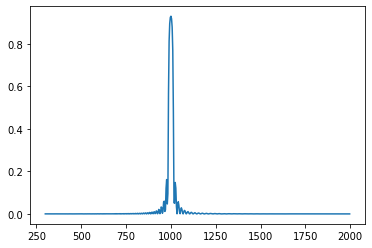

In [130]:
neta = 1
delta = 0.01
N = 1000
pitch = 200
x0 = 1000

X, Y = reflected_samples(neta, delta, N, pitch, x0)

plt.plot(X, Y)